In [1]:
%matplotlib inline
import pandas as pd
import scipy.stats
import seaborn as sns

# Load the data and extract the relevant columns.

In [2]:
response_df = pd.read_csv('responses.csv')
column_df = pd.read_csv('columns.csv')

In [3]:
response_df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [4]:
column_df.head()

,original,short
0,I enjoy listening to music.,Music
1,I prefer.,Slow songs or fast songs
2,"Dance, Disco, Funk",Dance
3,Folk music,Folk
4,Country,Country


In [5]:
dataset = response_df[['Finances', 'Gender','Village - town', 'Healthy eating']]

In [6]:
dataset.head()

,Finances,Gender,Village - town,Healthy eating
0,3.0,female,village,4.0
1,3.0,female,city,3.0
2,2.0,female,city,3.0
3,2.0,female,city,3.0
4,4.0,female,village,4.0


# Explore the data and understand how the data is distributed? Is there any outlier or missing value? And Share your insights.

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
Finances          1007 non-null float64
Gender            1004 non-null object
Village - town    1006 non-null object
Healthy eating    1007 non-null float64
dtypes: float64(2), object(2)
memory usage: 31.6+ KB


In [8]:
dataset.describe()

,Finances,Healthy eating
count,1007.000000,1007.000000
mean,3.023833,3.031778
std,1.144365,0.936865
min,1.000000,1.000000
25%,2.000000,3.000000
50%,3.000000,3.000000
75%,4.000000,4.000000
max,5.000000,5.000000


# Removing missing value records from dataset

In [9]:
dataset = dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 1009
Data columns (total 4 columns):
Finances          994 non-null float64
Gender            994 non-null object
Village - town    994 non-null object
Healthy eating    994 non-null float64
dtypes: float64(2), object(2)
memory usage: 38.8+ KB


# Checking and removing outlier

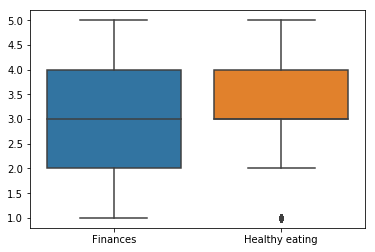

In [10]:
sns.boxplot(data=dataset)

In [11]:
Q1 = dataset[['Finances', 'Healthy eating']].quantile(0.25)
Q3 = dataset[['Finances', 'Healthy eating']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

#dataset = dataset[~((dataset[['Finances', 'Healthy eating']] < (Q1 - 1.5 * IQR)) |(dataset[['Finances', 'Healthy eating']] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(dataset.shape)

Finances          2.0
Healthy eating    1.0
dtype: float64
(994, 4)


# Create Hypothesis on the following questions

## Is saving money (finances) gender dependant?

### The null and alternative hypothesis:

Null Hypothesis - Saving Money(Finances) is gender independant

Alternative Hypothesis - Saving Money(Finances) is gender dependant

In [12]:
data = pd.crosstab(dataset['Finances'],dataset['Gender'])

chi_sq_Stat, p_value, deg_freedom, exp_freq = scipy.stats.chi2_contingency(data)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))

Chi-square statistic 6.03548 P value 0.196514 Degrees of freedom 4


Since P value is greater than 0.05% we accept the null hypothesis and conclude Saving Money is gender independent.

# Is there any differences in money saving (finances) between people from city or village?

Null Hypothesis - There is no difference in money saving between people from city or Village

Alternative Hypothesis - There is difference in money saving between people from city or Village

In [13]:
data = pd.crosstab(dataset['Finances'],dataset['Village - town'])

chi_sq_Stat, p_value, deg_freedom, exp_freq = scipy.stats.chi2_contingency(data)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))

Chi-square statistic 13.26651 P value 0.010044 Degrees of freedom 4


Since P value is less than 0.05% we reject the null hypothesis and conclude there is the difference in money saving

# Do Women have a Healthier Lifestyle than Men?

Null Hypothesis - Both Women and Men having Same Healthier Lifestyle 

Alternative Hypothesis - Yes there is difference in Women and men - Healthier Lifestyle

In [14]:
data = pd.crosstab(dataset['Healthy eating'],dataset['Gender'])

chi_sq_Stat, p_value, deg_freedom, exp_freq = scipy.stats.chi2_contingency(data)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))

Chi-square statistic 24.45214 P value 0.000065 Degrees of freedom 4


Since P value is less than 0.05% we reject the null hypothesis and conclude there is difference in Women and men - Healthier Lifestyle

In [15]:
print(data)

Gender          female  male
Healthy eating              
1.0                 35    44
2.0                 66    70
3.0                323   176
4.0                144    91
5.0                 20    25


By comparing the data point for 3-5, Woman has the healthier lifestyle than man

# Are Village People Healthier than City People?

Null Hypothesis - Village People and City People, Both people are Healthier 

Alternative Hypothesis - Yes, there is a difference Village and city people Health

In [16]:
data = pd.crosstab(dataset['Village - town'],dataset['Healthy eating'])

chi_sq_Stat, p_value, deg_freedom, exp_freq = scipy.stats.chi2_contingency(data)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))

Chi-square statistic 4.02242 P value 0.402980 Degrees of freedom 4


Since P value is greater than 0.05% we accept the null hypothesis and conclude Village People and City People, Both people are Healthier .